In [3]:
import yt
yt.set_log_level(40)    
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import io

In [4]:
import yt
yt.set_log_level(40)    
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# scratchPath = "/mnt/scratch/freem386/magpinch_fixed_may1/"
# basename = "magpinch"
scratchPath = "/mnt/gs21/scratch/freem386/new_pgen_magpinch/"
basename = "MPsimple"
f0, fn = 0, 15
step, width = 1, 5 
files = []
for f in np.arange(f0, fn+1, step, dtype=int):
    files.append(scratchPath + basename + ".out2." + str(f).zfill(width) + ".athdf")
print(files)

# unit_base={"length_unit": (1.0,"pc"), "time_unit": (1.0,"s*pc/km"), "mass_unit": (2.38858753789e-24,"g/cm**3*pc**3")}
ts = yt.DatasetSeries(files)
print("number of files: ", len(files))

# Initialize an empty list to store frames
frames = []

# Loop through indices
for index in range(16):  # from 0 to 100
    ds = ts[index]
    fields = [
        ('athena_pp', 'vel1'), ('gas', 'magnetic_field_x'), ('gas', 'mach_number'),             ('gas', 'pressure'),
        ('athena_pp', 'vel2'), ('gas', 'magnetic_field_y'), ('gas', 'density'),                 ('gas', 'specific_thermal_energy'),
        ('athena_pp', 'vel3'), ('gas', 'magnetic_field_z'), ('gas', 'magnetic_field_strength'), ('gas', 'magnetic_pressure')
    ]
    
    # Create a SlicePlot
    p = yt.SlicePlot(ds, "z", fields)
    
    # Export to a Matplotlib figure
    fig = p.export_to_mpl_figure((3, 4))
    fig.suptitle("Timestep " + str(index))
    
    # Adjust the layout
    fig.tight_layout(rect=[0, 0, 1, 1.2])  # Adjust rect to prevent overlap with suptitle
    fig.subplots_adjust(wspace=0.05, hspace=0.01)  # Set small values for minimal spacing
    
    # Iterate over each axis in the figure to modify the colorbar labels
    for ax, field in zip(fig.axes, fields):
        if hasattr(ax, 'images') and ax.images:
            img = ax.images[0]
            cbar = img.colorbar
            if cbar is not None:
                # Set the font size for the colorbar labels
                cbar.ax.tick_params(labelsize=8)
                # Set the custom label for the colorbar
                cbar.set_label(field[1], fontsize=14)
    
    # Convert figure to a frame
    frames.append(fig)
    plt.close(fig)  # Close the figure to avoid displaying it
    
# Create an animation from frames
animation = FuncAnimation(plt.figure(), lambda x: x, frames=frames, interval=100)  # 100 milliseconds per frame

# Save the animation as an mp4
animation.save('simulation_animation.mp4', fps=10)

['/mnt/gs21/scratch/freem386/new_pgen_magpinch/MPsimple.out2.00000.athdf', '/mnt/gs21/scratch/freem386/new_pgen_magpinch/MPsimple.out2.00001.athdf', '/mnt/gs21/scratch/freem386/new_pgen_magpinch/MPsimple.out2.00002.athdf', '/mnt/gs21/scratch/freem386/new_pgen_magpinch/MPsimple.out2.00003.athdf', '/mnt/gs21/scratch/freem386/new_pgen_magpinch/MPsimple.out2.00004.athdf', '/mnt/gs21/scratch/freem386/new_pgen_magpinch/MPsimple.out2.00005.athdf', '/mnt/gs21/scratch/freem386/new_pgen_magpinch/MPsimple.out2.00006.athdf', '/mnt/gs21/scratch/freem386/new_pgen_magpinch/MPsimple.out2.00007.athdf', '/mnt/gs21/scratch/freem386/new_pgen_magpinch/MPsimple.out2.00008.athdf', '/mnt/gs21/scratch/freem386/new_pgen_magpinch/MPsimple.out2.00009.athdf', '/mnt/gs21/scratch/freem386/new_pgen_magpinch/MPsimple.out2.00010.athdf', '/mnt/gs21/scratch/freem386/new_pgen_magpinch/MPsimple.out2.00011.athdf', '/mnt/gs21/scratch/freem386/new_pgen_magpinch/MPsimple.out2.00012.athdf', '/mnt/gs21/scratch/freem386/new_pgen_

<Figure size 640x480 with 0 Axes>

number of files:  3


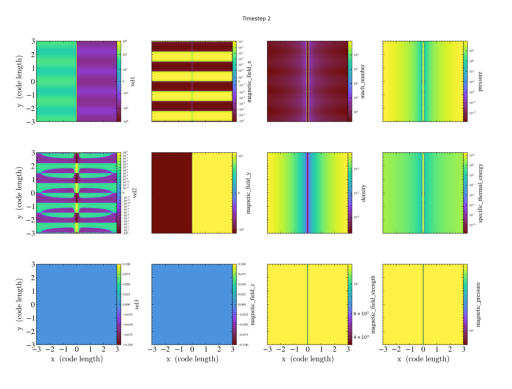

In [10]:
# Paths and file settings
scratchPath = "/mnt/gs21/scratch/freem386/new_pgen_magpinch/"
basename = "MPsimple"
f0, fn = 0, 2
step, width = 1, 5
files = [scratchPath + basename + ".out2." + str(f).zfill(width) + ".athdf" for f in np.arange(f0, fn+1, step, dtype=int)]

# Load dataset series
ts = yt.DatasetSeries(files)
print("number of files: ", len(files))

# Initialize an empty list to store frames as image buffers
frames = []

# Loop through indices
for index in range(len(files)):  # Ensure to loop over available datasets
    ds = ts[index]
    fields = [
        ('athena_pp', 'vel1'), ('gas', 'magnetic_field_x'), ('gas', 'mach_number'), ('gas', 'pressure'),
        ('athena_pp', 'vel2'), ('gas', 'magnetic_field_y'), ('gas', 'density'), ('gas', 'specific_thermal_energy'),
        ('athena_pp', 'vel3'), ('gas', 'magnetic_field_z'), ('gas', 'magnetic_field_strength'), ('gas', 'magnetic_pressure')
    ]
    
    # Create a SlicePlot
    p = yt.SlicePlot(ds, "z", fields)
    
    # Export to a Matplotlib figure
    fig = p.export_to_mpl_figure((3, 4))
    fig.set_size_inches((16, 12))  # Resize the figure
    fig.suptitle("Timestep " + str(index))
    
    # Adjust the layout
    fig.tight_layout(rect=[0, 0, 1, 1.0])  # Adjust rect to prevent overlap with suptitle
    fig.subplots_adjust(wspace=0.05, hspace=0.01)  # Set small values for minimal spacing
    
    # Iterate over each axis in the figure to modify the colorbar labels
    for ax, field in zip(fig.axes, fields):
        if hasattr(ax, 'images') and ax.images:
            img = ax.images[0]
            cbar = img.colorbar
            if cbar is not None:
                # Set the font size for the colorbar labels
                cbar.ax.tick_params(labelsize=8)
                # Set the custom label for the colorbar
                cbar.set_label(field[1], fontsize=14)
    
    # Save the figure to a buffer with increased DPI
    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=200)  # Increase DPI
    buf.seek(0)
    frames.append(np.array(plt.imread(buf)))
    buf.close()
    plt.close(fig)  # Close the figure to avoid displaying it
    
# Create an animation from frames
fig, ax = plt.subplots()
def update(frame):
    ax.clear()
    ax.imshow(frame)
    ax.axis('off')  # Turn off the axis

animation = FuncAnimation(fig, update, frames=frames, interval=500)  # 100 milliseconds per frame

# Save the animation as an mp4 with increased DPI
animation.save('simulation_animation.mp4', fps=2, dpi=400)  # Increase DPI for the animation